In [7]:
import psiresp

[ s for s in  psiresp.Molecule.__dict__.keys() if s.startswith('from')]  

['from_smiles', 'from_rdkit']

In [10]:
from prep import build_molecule_from_smiles
smile = "C[C@](CCCC=C)(C(=O)O)NC(=O)"
mol = build_molecule_from_smiles(smile)

psirespmol = psiresp.Molecule.from_rdkit(mol)
psirespmol 


Treating your molecule as a  residue
[1, 7, 8, 10]


In [41]:
from rdkit import Chem
import prep
patt_backbone = Chem.MolFromSmarts("C(C=O)N")
mol = build_molecule_from_smiles(smiles)
mol.GetSubstructMatch(patt_backbone)

#[atom.GetSymbol() for atom in mol.GetAtoms()]
[ at.for at in mol.GetAtoms()] 

Treating your molecule as a  residue
[1, 7, 8, 11]


AttributeError: 'Atom' object has no attribute 'index'

In [92]:
for at in [1,2,3] : 
    mol.GetAtomsWithIndx(at).GetSymbol()
    mol.GetAtomsWithIndx(at).GetHybridization()=="SP2"

#fragment_the_molecule:
mol1_f = Chem.FragmentOnBonds(mol1, (1,3))

AttributeError: 'Mol' object has no attribute 'GetAtomsWithIndx'

[6, 7, 10]


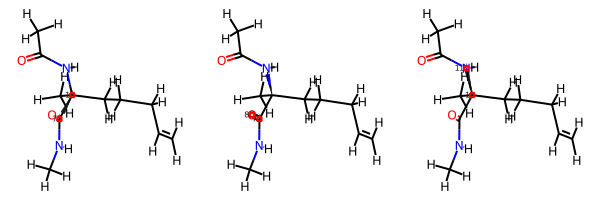

In [66]:
def get_match_bond_indices(query, mol, match_atom_indices):
    bond_indices = []
    for query_bond in query.GetBonds():
        atom_index1 = match_atom_indices[query_bond.GetBeginAtomIdx()]
        atom_index2 = match_atom_indices[query_bond.GetEndAtomIdx()]
        bond_indices.append(mol.GetBondBetweenAtoms(
             atom_index1, atom_index2).GetIdx())
    return bond_indices
patt_backbone = Chem.MolFromSmarts("C(C=O)N")
atom_indices = mol.GetSubstructMatch(patt_backbone)
bond_indices = get_match_bond_indices(patt_backbone, mol, atom_indices)
print(bond_indices)

mol1_f = Chem.FragmentOnSomeBonds(mol, bond_indices)


from rdkit.Chem import Draw
Draw.MolsToGridImage(mol1_f)

In [150]:
def get_match_bond_indices( mol, match_atom_indices):
    bond_indices = []
    frag_types=[]
    for query_bond in mol.GetBonds():
        
        if query_bond.GetBeginAtomIdx() in  match_atom_indices and query_bond.GetEndAtomIdx() not in  match_atom_indices : 
            bond_indices.append(query_bond.GetIdx())
            at= query_bond.GetBeginAtomIdx() 
            frag_types.append(get_type(mol ,at))

        elif query_bond.GetBeginAtomIdx() not in  match_atom_indices and query_bond.GetEndAtomIdx()  in  match_atom_indices : 
            bond_indices.append(query_bond.GetIdx())
            at= query_bond.GetEndAtomIdx() 
            frag_types.append(get_type(mol ,at))     
    return bond_indices , frag_types

def get_type(mol ,at):
    if mol.GetAtomWithIdx(at).GetSymbol() =="C" and str(mol.GetAtomWithIdx(at).GetHybridization())=="SP2" :
                print(mol.GetAtomWithIdx(at).GetHybridization())
                return ("capping")
    elif mol.GetAtomWithIdx(at).GetSymbol() =="N" : 
                return ("capping")
    elif  mol.GetAtomWithIdx(at).GetSymbol() =="C" and str(mol.GetAtomWithIdx(at).GetHybridization())=="SP3" :
                return ("sidechain")
    else :
                raise Exception("Probleme parsing the structure")

patt_backbone = Chem.MolFromSmarts("C(C=O)N([H])")

atom_indices = mol.GetSubstructMatch(patt_backbone)
print(atom_indices)
bond_indices ,frag_types = get_match_bond_indices( mol, atom_indices)
print(bond_indices ,frag_types )

mol1_f = Chem.FragmentOnBonds(mol, bond_indices,addDummies=False)

fragments_mols = Chem.GetMolFrags(mol1_f, sanitizeFrags=False)
print(frag_types)
frag_types.insert(fragments_mols.index(atom_indices)  ,"backbone")
mol1_f
print(fragments_mols)

#print(mol1_f.getAtomWithIdx(35).GetSymbol())

(1, 7, 8, 11, 31)
SP2
[0, 1, 8, 11] ['sidechain', 'sidechain', 'capping', 'capping']
['sidechain', 'sidechain', 'capping', 'capping']
((0, 15, 16, 17), (1, 7, 8, 11, 31), (2, 3, 4, 5, 6, 18, 19, 20, 21, 22, 23, 24, 25, 26), (9, 10, 27, 28, 29, 30), (12, 13, 14, 32, 33, 34))


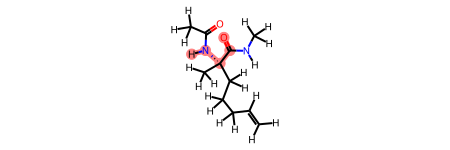

In [110]:
mol

In [1]:
from prep import build_molecule_from_smiles
from get_QM_energy import get_xyz_fromrdkitmol, run_qm_dih_PES
import matplotlib.pyplot as plt 
smile = "CNC(=O)[C@H](CCC[C@@H](NC(C)=O)C(=O)NC)NC(C)=O"
mol, res_type, backbone_list, capping_list = build_molecule_from_smiles(smile)
xyz = get_xyz_fromrdkitmol(mol)
print(backbone_list)

PES= run_qm_dih_PES(xyz ,basis = "HF/6-31G" , optimise=True)




Treating your residue as a stapled residue
SP2
SP2
((0, 1, 21, 22, 23, 24), (2, 3, 4, 17, 41), (5, 6, 7, 26, 27, 28, 29, 30, 31), (8, 9, 13, 14, 33), (10, 11, 12, 34, 35, 36), (15, 16, 37, 38, 39, 40), (18, 19, 20, 42, 43, 44), (25,), (32,))
[2, 3, 4, 17, 41]
[0, 1, 21, 22, 23, 24, 15, 16, 37, 38, 39, 40, 18, 19, 20, 42, 43, 44, 25]
[2, 3, 4, 17, 41, 8, 9, 13, 14, 33]
Scanning 0

 
 HERE


Time Veff  : 0.8672778850013856

 
 HERE


Time Veff  : 0.8928110319975531

 
 HERE


Time Veff  : 0.8333410659979563

 
 HERE


Time Veff  : 0.8989485619968036

 
 HERE


Time Veff  : 0.8040643240092322

 
 HERE


Time Veff  : 0.808741649001604

 
 HERE


Time Veff  : 0.815394496996305

 
 HERE


Time Veff  : 0.8031423369975528

 
 HERE


Time Veff  : 0.815066779992776

 
 HERE


Time Veff  : 0.8020162239990896

 
 HERE


Time Veff  : 0.7957970339921303

 
 HERE


Time Veff  : 0.8190982060041279

 
 HERE


Time Veff  : 0.8097084089968121

 
 HERE




: 

: 

In [3]:
import parmed
structure=parmed.load_file("mol.prmtop")



In [1]:
from get_QM_energy import run_some_conf
import matplotlib.pyplot as plt
from prep import build_molecule_from_smiles
smile = "CNC(=O)[C@H](CCC[C@@H](NC(C)=O)C(=O)NC)NC(C)=O"
mol, res_type, backbone_list, capping_list = build_molecule_from_smiles(smile)    

data = run_some_conf(mol=mol , n_confs=5 ,optimise=False)

Treating your residue as a stapled residue
SP2
SP2
((0, 1, 21, 22, 23, 24), (2, 3, 4, 17, 41), (5, 6, 7, 26, 27, 28, 29, 30, 31), (8, 9, 13, 14, 33), (10, 11, 12, 34, 35, 36), (15, 16, 37, 38, 39, 40), (18, 19, 20, 42, 43, 44), (25,), (32,))
[2, 3, 4, 17, 41]
[0, 1, 21, 22, 23, 24, 15, 16, 37, 38, 39, 40, 18, 19, 20, 42, 43, 44, 25]


/Users/Marie/Projects/2023-03-QMparam/Stapline/FFgenerationpipeline/get_QM_energy.py:99: FutureWarning: Using `psi4.set_module_options(<module>, {<key>: <val>})` instead of `psi4.set_options({<module>__<key>: <val>})` is deprecated, and as soon as 1.5 it will stop working

  psi4.set_module_options(



 
 HERE


Time Veff  : 5.070078261007438

 
 HERE


Time Veff  : 3.5621610550006153

 
 HERE


Time Veff  : 3.761113322005258

 
 HERE


Time Veff  : 3.289410413999576

 
 HERE


Time Veff  : 3.2398058979888447

 
 HERE


Time Veff  : 3.2749167629954172

 
 HERE


Time Veff  : 2.8051713589957217

 
 HERE


Time Veff  : 3.780509048010572

 
 HERE


Time Veff  : 3.6441495600010967

 
 HERE


Time Veff  : 3.9412350740021793

 
 HERE


Time Veff  : 3.9658025259996066

 
 HERE


Time Veff  : 3.7886787980096415

 
 HERE


Time Veff  : 4.104744555006619

 
 HERE


Time Veff  : 3.8336936959967716


In [3]:
import rdkit
from rdkit import Chem
import parmed

# Create an RDKit molecule from a SMILES string
smiles = 'CC(=O)OC1=CC=CC=C1C(=O)OCC'
mol = Chem.MolFromSmiles(smiles)

# Convert the RDKit molecule to a ParmEd structure object
structure = parmed.rdkit.load_rdkit(mol)
parm = parmed.amber.AmberParm()

# Assign the parameters to the structure
structure.load_parameters(parm)

# Access the atoms and bonds in the structure object
for atom in structure.atoms:
    print(atom.name, atom.type, atom.charge, atom.xx, atom.xy, atom.xz)
for bond in structure.bonds:
    print(bond.atom1, bond.atom2, bond.type.k, bond.type.req)


AttributeError: 'Structure' object has no attribute 'load_parameters'

In [ ]:
ch2.x(0) , ch2.y(0) ,ch2.z(0)
matrix=ch2.geometry().np
matrix.np

array([[ 1.94677170e+00,  1.43117153e+00,  9.64512369e-05],
       [ 1.61208867e-01,  1.31481473e+00, -6.07730477e-06],
       [-1.61208867e-01, -1.31481473e+00, -6.07730477e-06],
       [-1.94677170e+00, -1.43117153e+00,  9.64512369e-05]])

In [1]:
import parmed as pmd

# Load the structure from a PDB file
structure = pmd.load_file('my_structure.pdb')

# Calculate the MM energy of the structure
energy_components = structure.energies
mm_energy = sum(energy_components.values())

print("Total MM energy: {:.3f} kcal/mol".format(mm_energy))

FileNotFoundError: my_structure.pdb does not exist


	cc-pVDZ SCF energy as a function of phi



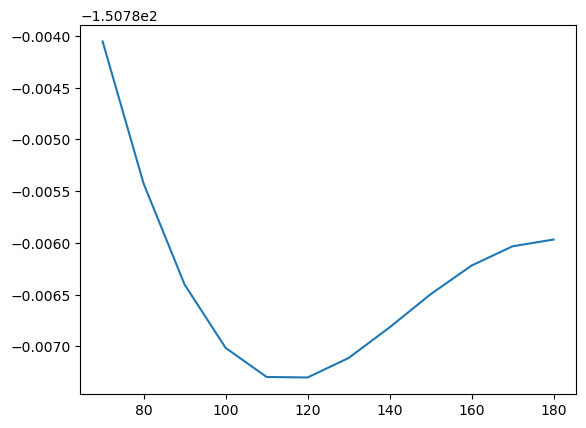

In [20]:
import matplotlib.pyplot as plt
print("\n\tcc-pVDZ SCF energy as a function of phi\n")
angles = [i[0] for i in PES]
energy = [i[1] for i in PES]
plt.plot(angles,energy)